In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from umap import UMAP
from sklearn.preprocessing import StandardScaler
import prince

import gower

%matplotlib inline
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

<IPython.core.display.Javascript object>

In [3]:
loans = pd.read_csv("data/sba_loans_cleaned3.csv")

<IPython.core.display.Javascript object>

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520954 entries, 0 to 520953
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               520954 non-null  object 
 1   BankState           520954 non-null  object 
 2   ApprovalFY          520954 non-null  int64  
 3   NoEmp               520954 non-null  int64  
 4   NewExist            520954 non-null  int64  
 5   RevLineCr           520421 non-null  float64
 6   LowDoc              516749 non-null  float64
 7   DisbursementGross   520954 non-null  float64
 8   MIS_Status          520954 non-null  int64  
 9   twoDigNAICS         520954 non-null  int64  
 10  is_franchise        520954 non-null  float64
 11  bank_out_of_state   520954 non-null  int64  
 12  Term_years          520954 non-null  float64
 13  job_category        520954 non-null  float64
 14  retained_category   520954 non-null  float64
 15  UrbanRural_cleaned  514461 non-nul

<IPython.core.display.Javascript object>

In [5]:
loans.head()
loans = loans.dropna()

<IPython.core.display.Javascript object>

In [6]:
drop_cols = [
    "ApprovalFY",
    "Disbr_Month_sin",
    "Disbr_Month_cos",
    "Appv_Month_sin",
    "Appv_Month_cos",
]
loans = loans.drop(columns=drop_cols)

<IPython.core.display.Javascript object>

In [7]:
loans["twoDigNAICS"].value_counts()

44    62620
72    58919
54    51748
81    49387
23    49170
62    35962
42    32022
56    27600
45    27319
33    24333
48    18080
32    12074
53    11326
71    10325
51     8879
52     8525
31     8260
61     5835
11     4151
49     1935
21     1058
22      409
55      132
92       80
0        11
Name: twoDigNAICS, dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
loans

In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510160 entries, 0 to 520953
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               510160 non-null  object 
 1   BankState           510160 non-null  object 
 2   NoEmp               510160 non-null  int64  
 3   NewExist            510160 non-null  int64  
 4   RevLineCr           510160 non-null  float64
 5   LowDoc              510160 non-null  float64
 6   DisbursementGross   510160 non-null  float64
 7   MIS_Status          510160 non-null  int64  
 8   twoDigNAICS         510160 non-null  int64  
 9   is_franchise        510160 non-null  float64
 10  bank_out_of_state   510160 non-null  int64  
 11  Term_years          510160 non-null  float64
 12  job_category        510160 non-null  float64
 13  retained_category   510160 non-null  float64
 14  UrbanRural_cleaned  510160 non-null  float64
 15  Disbr_year          510160 non-nul

<IPython.core.display.Javascript object>

In [9]:
num_cols = ["NoEmp", "DisbursementGross", "Term_years", "Disbr_year", "percent_SBA"]
cat_cols = [
    "State",
    "BankState",
    # "MIS_Status",
    "twoDigNAICS",
    "NewExist",
    "RevLineCr",
    "LowDoc",
    "is_franchise",
    "bank_out_of_state",
    "UrbanRural_cleaned",
]

<IPython.core.display.Javascript object>

In [10]:
is_cat = loans.columns.isin(cat_cols)

<IPython.core.display.Javascript object>

In [11]:
nums = loans[num_cols]

<IPython.core.display.Javascript object>

In [12]:
sample = loans.sample(1000, random_state=42)

<IPython.core.display.Javascript object>

In [13]:
gower_dist = gower.gower_matrix(sample, cat_features=is_cat)

<IPython.core.display.Javascript object>

In [14]:
gower_df = pd.DataFrame(gower_dist, columns=sample.index, index=sample.index)

<IPython.core.display.Javascript object>

In [15]:
k = 5
nrows = gower_df.shape[0]
init_medoids = np.random.randint(0, nrows, k)
init_medoids

array([409, 633, 489, 445, 600])

<IPython.core.display.Javascript object>

In [16]:
kmed = kmedoids(
    gower_dist, initial_index_medoids=init_medoids, data_type="distance_matrix"
)

kmed.process()

<IPython.core.display.Javascript object>

In [17]:
medoid_idxs = kmed.get_medoids()
medoid_idxs

labels = kmed.predict(gower_dist)

sample["label"] = labels

<IPython.core.display.Javascript object>

In [18]:
sample.iloc[medoid_idxs, :]

,State,BankState,NoEmp,NewExist,RevLineCr,LowDoc,DisbursementGross,MIS_Status,twoDigNAICS,is_franchise,bank_out_of_state,Term_years,job_category,retained_category,UrbanRural_cleaned,Disbr_year,sba_pre_approv,percent_SBA,bank_size,label
419779,WA,CA,3,0,0.0,0.0,208000.0,0,44,0.0,0,10.000000,0.0,1.0,0.0,2004,1.0,0.75,2.0,0
520026,CA,CA,2,0,0.0,0.0,70000.0,0,72,0.0,1,10.000000,0.0,1.0,0.0,2006,1.0,0.85,2.0,1
124795,CA,NC,1,0,1.0,0.0,34420.0,1,54,0.0,0,5.583333,0.0,1.0,0.0,2007,1.0,0.50,2.0,2
320218,TX,TX,1,1,0.0,0.0,113000.0,0,72,0.0,1,7.500000,0.0,0.0,1.0,2003,1.0,0.85,0.0,3
448929,IL,IL,5,0,1.0,0.0,55039.0,0,42,0.0,1,7.000000,1.0,1.0,0.0,2004,1.0,0.50,2.0,4


<IPython.core.display.Javascript object>

In [19]:
clst_avg = sample.groupby("label").mean().T
clst_avg.style.background_gradient(axis=1)

label,0,1,2,3,4
NoEmp,7.541667,10.109489,7.557196,13.651584,6.993548
NewExist,0.379630,0.167883,0.136531,0.542986,0.212903
RevLineCr,0.000000,0.000000,0.804428,0.036199,0.980645
LowDoc,0.004630,0.014599,0.000000,0.271493,0.000000
DisbursementGross,230501.180556,236337.627737,72935.177122,308330.221719,178161.645161
MIS_Status,0.157407,0.094891,0.546125,0.149321,0.135484
twoDigNAICS,51.254630,52.781022,49.014760,54.832579,48.535484
is_franchise,0.046296,0.014599,0.011070,0.190045,0.000000
bank_out_of_state,0.000000,0.985401,0.011070,0.841629,0.677419
Term_years,9.564815,9.114355,4.765990,10.570513,5.383871


<IPython.core.display.Javascript object>

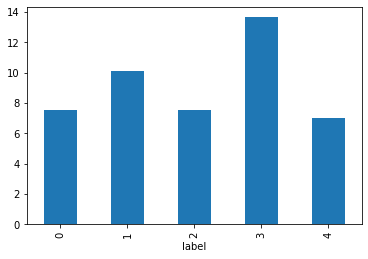

<IPython.core.display.Javascript object>

In [20]:
sample.groupby("label")["NoEmp"].mean().plot.bar()

In [44]:
loans["MIS_Status"].mean()

0.24801434843970518

<IPython.core.display.Javascript object>

In [43]:
sample.groupby("label")["MIS_Status"].mean()

label
0    0.157407
1    0.094891
2    0.546125
3    0.149321
4    0.135484
Name: MIS_Status, dtype: float64

<IPython.core.display.Javascript object>

In [21]:
clst = DBSCAN(eps=0.2, min_samples=3, metric="precomputed")
clst.fit(gower_dist)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='precomputed',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

<IPython.core.display.Javascript object>

In [22]:
# clst.labels_

<IPython.core.display.Javascript object>

C:\Users\dgump\miniconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


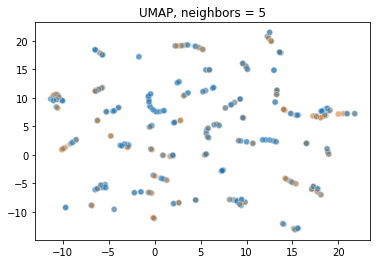

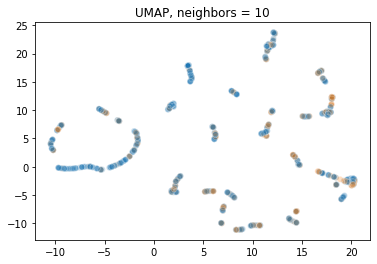

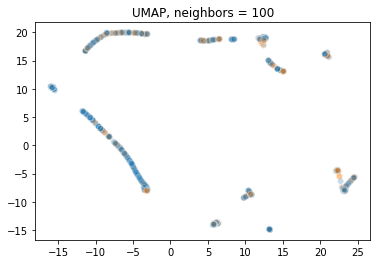

<IPython.core.display.Javascript object>

In [23]:
scaler = StandardScaler()
X_train_sub = sample[num_cols]


ns = [5, 10, 100]
for n in ns:
    umap = UMAP(n_neighbors=n, n_components=2)
    X_train_sub_umap = umap.fit_transform(X_train_sub)
    sns.scatterplot(
        X_train_sub_umap[:, 0],
        X_train_sub_umap[:, 1],
        hue=sample["MIS_Status"],
        alpha=0.25,
    )
    plt.title(f"UMAP, neighbors = {n}")
    plt.legend().remove()
    plt.show()

In [24]:
X = loans.drop(columns=["MIS_Status"])
y = loans["MIS_Status"]

<IPython.core.display.Javascript object>

In [25]:
X.isna().sum()
X["DisbursementGross"].describe()

count    5.101600e+05
mean     1.864525e+05
std      3.104165e+05
min      4.000000e+03
25%      3.120700e+04
50%      7.500000e+04
75%      1.920000e+05
max      1.144632e+07
Name: DisbursementGross, dtype: float64

<IPython.core.display.Javascript object>

In [26]:
nums = X[num_cols]


<IPython.core.display.Javascript object>

In [27]:
X.shape

(510160, 18)

<IPython.core.display.Javascript object>

In [28]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X[num_cols])
X_std = pd.DataFrame(X_std, columns=num_cols, index=X[num_cols].index)
# pd.DataFrame(scaler.fit_transform(X[num_cols]), columns=num_cols)

scaled_X = pd.concat((X_std, X[cat_cols]), axis=1)
scaled_X

,NoEmp,DisbursementGross,Term_years,Disbr_year,percent_SBA,State,BankState,twoDigNAICS,NewExist,RevLineCr,LowDoc,is_franchise,bank_out_of_state,UrbanRural_cleaned
0,-0.149972,0.215670,1.024140,0.249530,0.645611,NC,MN,44,1,0.0,0.0,1.0,0,0.0
1,-0.033831,-0.158344,0.491160,0.249530,1.223700,AR,MS,72,0,0.0,0.0,0.0,0,0.0
2,0.221680,0.812099,-0.145456,0.249530,-0.799610,CA,SD,61,1,1.0,0.0,0.0,0,0.0
3,-0.103516,-0.434940,-0.130651,0.249530,-0.799610,FL,FL,23,0,1.0,0.0,0.0,1,0.0
4,-0.126744,-0.439579,-0.485971,0.249530,1.223700,LA,LA,53,0,0.0,0.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520949,-0.149972,-0.504009,-0.130651,0.249530,-0.799610,CO,IL,61,0,1.0,0.0,0.0,0,1.0
520950,-0.149972,-0.053001,-0.944926,0.249530,0.645611,AZ,WI,81,1,0.0,0.0,0.0,0,0.0
520951,0.268136,1.039081,2.178931,0.641835,2.090833,NV,NV,23,0,0.0,0.0,0.0,1,0.0
520952,-0.126744,-0.550285,-0.130651,0.249530,-0.799610,AZ,AL,51,0,1.0,0.0,0.0,0,0.0


<IPython.core.display.Javascript object>

In [29]:
X[cat_cols]

,State,BankState,twoDigNAICS,NewExist,RevLineCr,LowDoc,is_franchise,bank_out_of_state,UrbanRural_cleaned
0,NC,MN,44,1,0.0,0.0,1.0,0,0.0
1,AR,MS,72,0,0.0,0.0,0.0,0,0.0
2,CA,SD,61,1,1.0,0.0,0.0,0,0.0
3,FL,FL,23,0,1.0,0.0,0.0,1,0.0
4,LA,LA,53,0,0.0,0.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...
520949,CO,IL,61,0,1.0,0.0,0.0,0,1.0
520950,AZ,WI,81,1,0.0,0.0,0.0,0,0.0
520951,NV,NV,23,0,0.0,0.0,0.0,1,0.0
520952,AZ,AL,51,0,1.0,0.0,0.0,0,0.0


<IPython.core.display.Javascript object>

In [30]:
famd = prince.FAMD(n_components=2)
famd.fit(scaled_X)

FAMD(check_input=True, copy=True, engine='auto', n_components=2, n_iter=3,
     random_state=None)

<IPython.core.display.Javascript object>

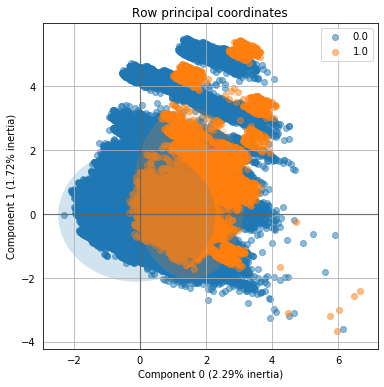

<IPython.core.display.Javascript object>

In [31]:
famd.plot_row_coordinates(scaled_X, color_labels=X["LowDoc"], alpha=0.5)
plt.show()

# , color_labels=X["LowDoc"]

In [34]:
famd.row_coordinates()

TypeError: row_coordinates() missing 1 required positional argument: 'X'

<IPython.core.display.Javascript object>

Re-engineered some of the data to have more continuous variables. 

In [35]:
loans.head()

,State,BankState,NoEmp,NewExist,RevLineCr,LowDoc,DisbursementGross,MIS_Status,twoDigNAICS,is_franchise,bank_out_of_state,Term_years,job_category,retained_category,UrbanRural_cleaned,Disbr_year,sba_pre_approv,percent_SBA,bank_size
0,NC,MN,2,1,0.0,0.0,253400.0,0,44,1.0,0,13.500000,0.0,0.0,0.0,2006,1.0,0.75,1.0
1,AR,MS,7,0,0.0,0.0,137300.0,0,72,0.0,0,10.500000,0.0,0.0,0.0,2006,1.0,0.85,0.0
2,CA,SD,18,1,1.0,0.0,438541.0,0,61,0.0,0,6.916667,1.0,2.0,0.0,2006,1.0,0.50,2.0
3,FL,FL,4,0,1.0,0.0,51440.0,0,23,0.0,1,7.000000,0.0,1.0,0.0,2006,1.0,0.50,2.0
4,LA,LA,3,0,0.0,0.0,50000.0,0,53,0.0,1,5.000000,0.0,0.0,0.0,2006,1.0,0.85,0.0


<IPython.core.display.Javascript object>

In [37]:
loans2 = pd.read_csv("data/SBA_clnd.csv")
loans2.head()

,Name,City,State,Zip,Bank,BankState,ApprovalFY,NoEmp,NewExist,CreateJob,RetainedJob,RevLineCr,LowDoc,DisbursementGross,MIS_Status,twoDigNAICS,is_franchise,bank_out_of_state,Term_years,UrbanRural_cleaned,Disbr_year,Disbr_Month_sin,Disbr_Month_cos,sba_pre_approv,percent_SBA,bank_size,Appv_Month_sin,Appv_Month_cos
0,CARVEL,APEX,NC,27502,STEARNS BK NATL ASSOC,MN,2006,2,1,0,0,0.0,0.0,253400.0,0,44,1.0,0,13.500000,0.0,2006,0.866025,5.000000e-01,1.0,0.75,1.0,0.5,0.866025
1,SUBWAY,LITTLE ROCK,AR,72223,HOPE FCU,MS,2006,7,0,0,0,0.0,0.0,137300.0,0,72,0.0,0,10.500000,0.0,2006,1.000000,6.123234e-17,1.0,0.85,0.0,0.5,0.866025
2,WEYLAND CORPORATION,CAMARILLO,CA,93010,WELLS FARGO BANK NATL ASSOC,SD,2006,18,1,5,23,1.0,0.0,438541.0,0,61,0.0,0,6.916667,0.0,2006,0.500000,8.660254e-01,1.0,0.50,2.0,0.5,0.866025
3,CHICAGO BRICK UNLIMITED INC,MIAMI,FL,33186,"CITIBANK, N.A.",FL,2006,4,0,0,4,1.0,0.0,51440.0,0,23,0.0,1,7.000000,0.0,2006,0.500000,8.660254e-01,1.0,0.50,2.0,0.5,0.866025
4,"RZI, INC.",NEW ORLEANS,LA,70130,BUSINESS RES. CAP. SPECIALTY B,LA,2006,3,0,0,0,0.0,0.0,50000.0,0,53,0.0,1,5.000000,0.0,2006,0.866025,-5.000000e-01,1.0,0.85,0.0,0.5,0.866025


<IPython.core.display.Javascript object>

In [41]:
loans2 = loans2.drop(columns=drop_cols)


,Name,City,State,Zip,Bank,BankState,NoEmp,NewExist,CreateJob,RetainedJob,RevLineCr,LowDoc,DisbursementGross,MIS_Status,twoDigNAICS,is_franchise,bank_out_of_state,Term_years,UrbanRural_cleaned,Disbr_year,sba_pre_approv,percent_SBA,bank_size
0,CARVEL,APEX,NC,27502,STEARNS BK NATL ASSOC,MN,2,1,0,0,0.0,0.0,253400.0,0,44,1.0,0,13.500000,0.0,2006,1.0,0.75,1.0
1,SUBWAY,LITTLE ROCK,AR,72223,HOPE FCU,MS,7,0,0,0,0.0,0.0,137300.0,0,72,0.0,0,10.500000,0.0,2006,1.0,0.85,0.0
2,WEYLAND CORPORATION,CAMARILLO,CA,93010,WELLS FARGO BANK NATL ASSOC,SD,18,1,5,23,1.0,0.0,438541.0,0,61,0.0,0,6.916667,0.0,2006,1.0,0.50,2.0
3,CHICAGO BRICK UNLIMITED INC,MIAMI,FL,33186,"CITIBANK, N.A.",FL,4,0,0,4,1.0,0.0,51440.0,0,23,0.0,1,7.000000,0.0,2006,1.0,0.50,2.0
4,"RZI, INC.",NEW ORLEANS,LA,70130,BUSINESS RES. CAP. SPECIALTY B,LA,3,0,0,0,0.0,0.0,50000.0,0,53,0.0,1,5.000000,0.0,2006,1.0,0.85,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510155,5280 MARTIAL ARTS,HIGHLANDS RANCH,CO,80230,JPMORGAN CHASE BANK NATL ASSOC,IL,2,0,0,2,1.0,0.0,30000.0,0,61,0.0,0,7.000000,1.0,2006,1.0,0.50,2.0
510156,THE VALLA GROUP INC,CHANDLER,AZ,85226,"M&I, A BRANCH OF",WI,2,1,2,2,0.0,0.0,170000.0,1,81,0.0,0,2.416667,0.0,2006,1.0,0.75,1.0
510157,ARTESIA CABINETS,LAS VEGAS,NV,89118,NEVADA ST. DEVEL CORP,NV,20,0,15,0,0.0,0.0,509000.0,0,23,0.0,1,20.000000,0.0,2007,1.0,1.00,1.0
510158,VDL MOTOR SPORTS LLC,VAIL,AZ,85641,COMPASS BANK,AL,3,0,0,3,1.0,0.0,15635.0,0,51,0.0,0,7.000000,0.0,2006,1.0,0.50,2.0


<IPython.core.display.Javascript object>